## 1

#### Import the furniture_data data file using pandas. Check the length of the DataFrame. Find the sum of duplicates in the "Product" column. Using the pandas pivot_table() function, return a table that shows how many times each product appears in the "Product" column. This table will reveal which products are duplicated.

In [1]:
import pandas as pd 

df = pd.read_csv("furniture_data.csv")
df.head()

,Product,Sale Price,Cost per Product,Quantity,Total Revenue
0,Sofa,800,600,32,25600
1,Chair,300,200,12,3600
2,Table,500,300,41,20500
3,Bed,1000,700,23,23000
4,Wardrobe,800,600,19,15200


In [2]:
# Finding length of the DataFrame
len(df)

16

In [3]:
df.Product.duplicated().sum()

6

In [4]:
# Counting duplicates in the product column
df_duplicates = df.pivot_table(index = ['Product'], aggfunc ='size')
print(df_duplicates)

Product
Bed             1
Bookshelf       2
Chair           1
Coffee Table    2
Dresser         2
Ottoman         2
Rug             2
Sofa            1
Table           1
Wardrobe        2
dtype: int64


## 2. 

#### Use Seaborn regplot() to fit a linear regression model and visualize the relationship between the price of each item and total revenue.

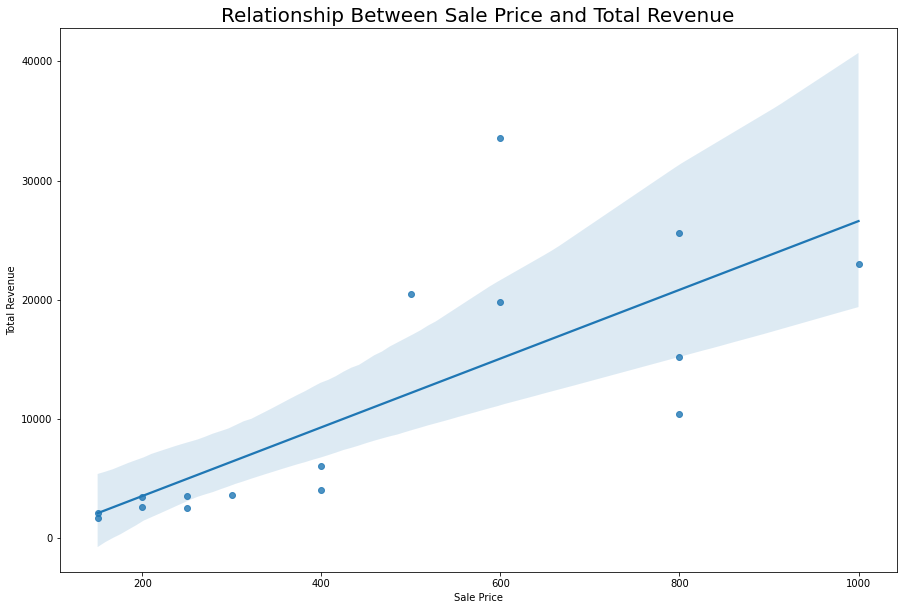

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


fig = plt.figure(figsize=(15, 10))
sns.regplot(x=df["Sale Price"],
            y=df["Total Revenue"],
            data=df)

plt.title("Relationship Between Sale Price and Total Revenue", fontsize= 20)
plt.show()

## 3.

#### What is the difference in revenue between wardrobes and beds?

In [6]:
# Grouping data by product and summing the total revenue column
df_group = df.groupby("Product")["Total Revenue"].sum()

# Calculating the difference
wardrobes_less_bed_revenue = df_group.Wardrobe -  df_group.Bed 
print(wardrobes_less_bed_revenue)

2600


Another way

In [7]:
# using loc to locate wardrobe and bed
wardrobes_revenue = df.loc[df["Product"] == "Wardrobe","Total Revenue"].sum()  
beds_revenue = df.loc[df["Product"] == "Bed","Total Revenue"].sum()
print(wardrobes_revenue - beds_revenue)

2600


## 4. 

#### Calculate the "Total_Cost" column and insert it in the DataFrame between the "Quantity" and "Total Revenue.". Use the pandas insert() function.

In [8]:
# Calculating the total costs
Total_Costs = df["Cost per Product"] * df["Quantity"]

# Using insert to insert column on index 4
df.insert(4, 'Total_Costs', Total_Costs)
df.head()

,Product,Sale Price,Cost per Product,Quantity,Total_Costs,Total Revenue
0,Sofa,800,600,32,19200,25600
1,Chair,300,200,12,2400,3600
2,Table,500,300,41,12300,20500
3,Bed,1000,700,23,16100,23000
4,Wardrobe,800,600,19,11400,15200


## 5.

#### Which product has the least profit margin?

In [9]:
# Calculating the profit for each product
df["Profit"] = df["Total Revenue"] - df["Total_Costs"]

# Grouping data by product and summing revenue and profit
df_group = df.groupby("Product")[["Total Revenue","Profit"]].sum()

# Calculating profit margin for each product
df_group["Profit_Margin"] = (df_group["Profit"]/df_group["Total Revenue"])*100

# Sorting data by profit margin and returning the first product
df_group.sort_values(by="Profit_Margin", ascending=True).head(1)

,Total Revenue,Profit,Profit_Margin
Product,,,
Dresser,53400,8900,16.666667
